In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
img_width, img_height = 48, 48
train_data_dir = 'path/to/train'
val_data_dir = 'path/to/validation'
batch_size = 64
num_classes = 7
epochs = 50


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:00<00:00, 168MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [8]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1"
print("Contents of dataset directory:", os.listdir(dataset_path))


Contents of dataset directory: ['test', 'train']


In [9]:
train_data_dir = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train"
val_data_dir = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test"


In [10]:
# Data augmentation to improve model generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images from the dataset directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
model = Sequential()

# Add layers to the CNN model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 143s 313ms/step - accuracy: 0.2385 - loss: 1.8403 - val_accuracy: 0.2496 - val_loss: 1.8016
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.1875 - loss: 1.8460 - val_accuracy: 0.3000 - val_loss: 1.7292
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 136s 302ms/step - accuracy: 0.2480 - loss: 1.8013 - val_accuracy: 0.2585 - val_loss: 1.7810
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 77us/step - accuracy: 0.2969 - loss: 1.7094 - val_accuracy: 0.2000 - val_loss: 2.0287
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 146s 311ms/step - accuracy: 0.2498 - loss: 1.7957 - val_accuracy: 0.2683 - val_loss: 1.7651
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.2031 - loss: 1.7606 - val_accuracy: 0.2000 - val_loss: 1.7026
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 136s 304ms/step - accuracy: 0.2559 - loss: 1.7853 - val_accuracy: 0.2881 - val_loss: 1.7444
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2656 - loss: 1.7463 - val_accuracy: 0.3000 - val_loss: 1.7108
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 136s 293ms/step - accuracy: 0.2640 - loss: 1.7745 - val_accuracy: 0.3037 - val_loss: 1.7335
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.2969 - loss: 1.6757 - val_acc

In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.4544 - loss: 1.4148
Validation Loss: 1.4105972051620483
Validation Accuracy: 0.4590415060520172


In [14]:
# Save the trained model
model.save("facial_expression_recognition_model.h5")


In [16]:
import matplotlib.pyplot as plt


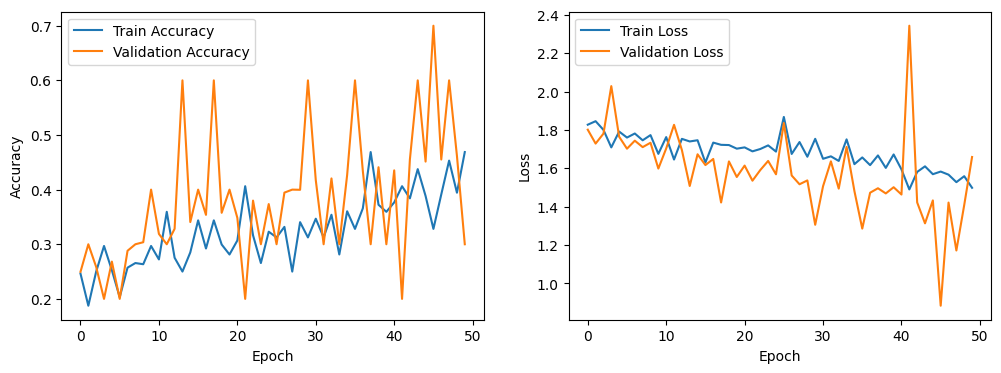

In [17]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


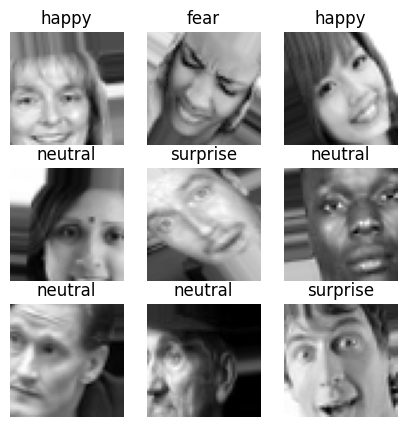

In [19]:
import numpy as np
import matplotlib.pyplot as plt
class_names = list(train_generator.class_indices.keys())
def display_sample_images(generator, num_images=9):

    images, labels = next(generator)
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(48, 48), cmap='gray')
        label_idx = np.argmax(labels[i])
        plt.title(class_names[label_idx])
        plt.axis("off")

    plt.show()
display_sample_images(train_generator)
